can we reproduce the FFD profiles we see using random numbers? Should just be a reality check


put another way... given a cartoon light curve drawn from realistic FFD & flare properties, can we say that a given month of data is a 1-, 3-, 5-sigma outlier from our expectation?

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import lightkurve as lk
from astropy.table import Table

from stuff import *

import powerlaw

import sys
sys.path.append('/Users/james/Dropbox/research_projects/FFD/')
from FFD import FFD

sys.path.append('/Users/james/Dropbox/python/Llamaradas-Estelares/')
from Flare_model import flare_model

from scipy.stats import binned_statistic

In [6]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [7]:
# Perror

In [8]:
a, xmin = 2, 1.0
N = 100

# ge/nerates random variates of power law distribution
vrs = powerlaw.Power_Law(xmin=xmin, parameters=[a]).generate_random(N)

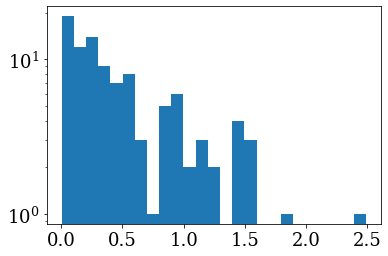

In [9]:
_=plt.hist(np.log10(vrs),bins=25)
plt.yscale('log')

Text(0.5, 1.0, 'mock ffd, N=100')

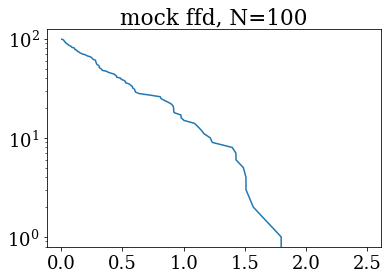

In [10]:
xx = np.log10(vrs[np.argsort(vrs)])
yy = np.arange(len(xx))[::-1]
plt.plot(xx,yy)
plt.yscale('log')
plt.title('mock ffd, N='+str(N))

In [11]:
a, xmin = 2, 1.0 # standard powerlaw parameters
TOTDUR = 25. # days
Lum = 30. # arbitrary log-lum zeropoint for flares

/Users/james/opt/anaconda3/lib/python3.8/site-packages/powerlaw.py:1199: RuntimeWarning: invalid value encountered in reciprocal
  return self.xmin * (1 - r) ** (-1/(self.alpha - 1))


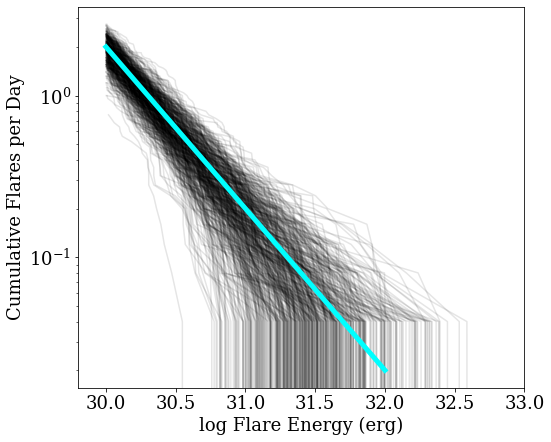

In [49]:
Nsector = 500 # how many simulations?

Nflares = 50 # typical  number of flares
Nflare_std = 8

plt.figure(figsize=(8,7))
for k in range(Nsector):
    # ge/nerates random variates of power law distribution
    Nflare_k = int(Nflares + np.random.normal(loc=0, scale=Nflare_std))

    vrs = powerlaw.Power_Law(xmin=xmin, parameters=[a]).generate_random(Nflare_k)
    xx = np.log10(vrs[np.argsort(vrs)]) + Lum
    yy = np.arange(len(xx))[::-1] / TOTDUR
    plt.plot(xx,yy, c='k', alpha=0.1)
    
plt.yscale('log')

plt.xlabel('log Flare Energy (erg)')
plt.ylabel('Cumulative Flares per Day')
plt.xlim(29.8,33)
plt.plot([30,32],[50/25,.5/25], c='cyan', lw=5)

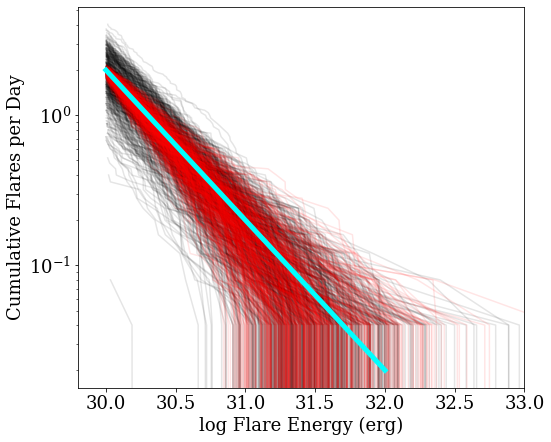

In [13]:
Nsector = 500 # how many simulations?

Nflares = 50 # typical  number of flares
Nflare_std = 15

plt.figure(figsize=(8,7))
for k in range(Nsector):
    # ge/nerates random variates of power law distribution
    Nflare_k = int(Nflares + np.random.normal(loc=0, scale=Nflare_std))

    vrs = powerlaw.Power_Law(xmin=xmin, parameters=[a]).generate_random(Nflare_k)
    xx = np.log10(vrs[np.argsort(vrs)]) + Lum
    yy = np.arange(len(xx))[::-1] / TOTDUR
    plt.plot(xx,yy, c='k', alpha=0.1)

Nflare_std = 2

for k in range(Nsector):
    Nflare_k = int(Nflares + np.random.normal(loc=0, scale=Nflare_std))

    vrs = powerlaw.Power_Law(xmin=xmin, parameters=[a]).generate_random(Nflare_k)
    xx = np.log10(vrs[np.argsort(vrs)]) + Lum
    yy = np.arange(len(xx))[::-1] / TOTDUR
    plt.plot(xx,yy, c='r', alpha=0.1)
    
plt.yscale('log')

plt.xlabel('log Flare Energy (erg)')
plt.ylabel('Cumulative Flares per Day')
plt.xlim(29.8,33)
plt.plot([30,32],[50/25,.5/25], c='cyan', lw=5)

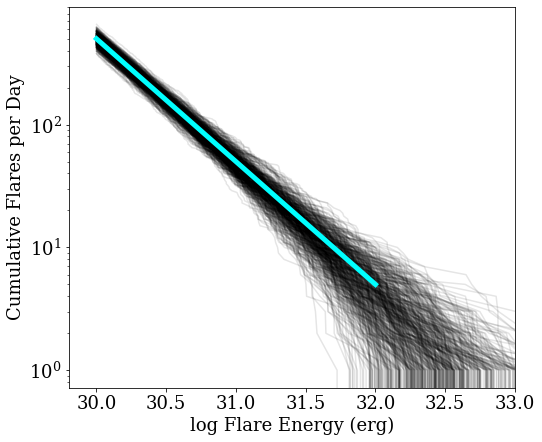

In [14]:
Nsector = 500 # how many simulations?

Nflares = 500 # typical  number of flares
Nflare_std = 50

plt.figure(figsize=(8,7))
for k in range(Nsector):
    # ge/nerates random variates of power law distribution
    Nflare_k = int(Nflares + np.random.normal(loc=0, scale=Nflare_std))

    vrs = powerlaw.Power_Law(xmin=xmin, parameters=[a]).generate_random(Nflare_k)
    xx = np.log10(vrs[np.argsort(vrs)]) + Lum
    yy = np.arange(len(xx))[::-1]
    plt.plot(xx,yy, c='k', alpha=0.1)
    
plt.yscale('log')

plt.xlabel('log Flare Energy (erg)')
plt.ylabel('Cumulative Flares per Day')
plt.xlim(29.8,33)
plt.plot([30,32],[500,5], c='cyan', lw=5)

Text(0, 0.5, 'Lfl_Lbol')

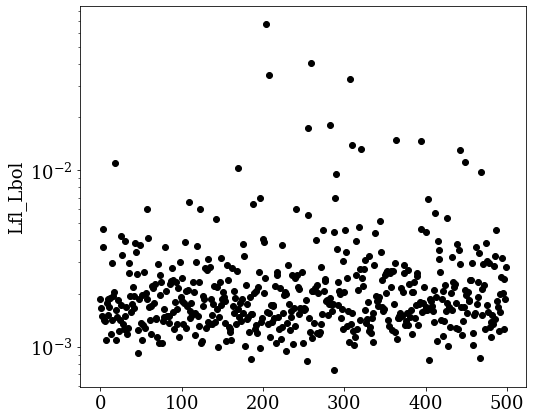

In [15]:
# do the same thing, but show variation in Lfl_lbol we expect

Nsector = 500 # how many simulations?

Nflares = 500 # typical  number of flares
Nflare_std = 50

plt.figure(figsize=(8,7))
for k in range(Nsector):
    # ge/nerates random variates of power law distribution
    Nflare_k = int(Nflares + np.random.normal(loc=0, scale=Nflare_std))

    vrs = powerlaw.Power_Law(xmin=xmin, parameters=[a]).generate_random(Nflare_k)
    yy = np.sum(vrs) / (TOTDUR * 24*60*60)
    plt.scatter(k,yy, c='k')#, alpha=0.1)
    
plt.yscale('log')
plt.ylabel('Lfl_Lbol')


Text(0, 0.5, 'Lfl_Lbol')

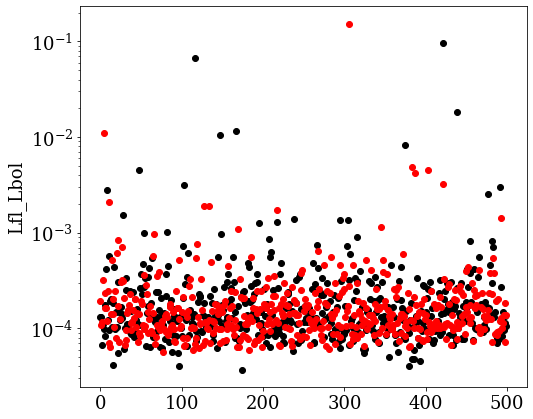

In [51]:
# do the same thing, but show variation in Lfl_lbol we expect

Nsector = 500 # how many simulations?
Nflares = 50 # typical  number of flares
Nflare_std = 8

plt.figure(figsize=(8,7))
for k in range(Nsector):
    # ge/nerates random variates of power law distribution
    Nflare_k = int(Nflares + np.random.normal(loc=0, scale=Nflare_std))

    vrs = powerlaw.Power_Law(xmin=xmin, parameters=[a]).generate_random(Nflare_k)
    yy = np.sum(vrs) / (TOTDUR * 24*60*60)
    plt.scatter(k,yy, c='k')#, alpha=0.1)
    
Nflare_std = 2
for k in range(Nsector):
    # ge/nerates random variates of power law distribution
    Nflare_k = int(Nflares + np.random.normal(loc=0, scale=Nflare_std))

    vrs = powerlaw.Power_Law(xmin=xmin, parameters=[a]).generate_random(Nflare_k)
    yy = np.sum(vrs) / (TOTDUR * 24*60*60)
    plt.scatter(k,yy, c='r')#, alpha=0.1)

plt.yscale('log')
plt.ylabel('Lfl_Lbol')

## Thoughts
So it is clear that the FFD variation depends on N (as expected, Poisson etc), and intrinsic scatter term.

Can I parameterize this in a sensible way so that we can FIT this scatter term?

The Lfl_Lbol space moves differently... i wonder if that has a similar scatter parameterization i can explore/utilize?

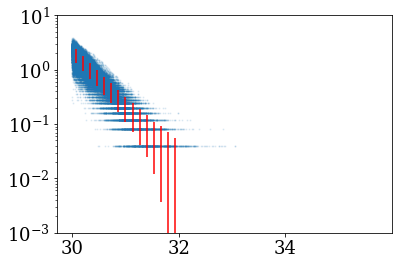

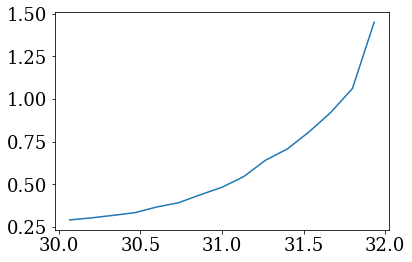

In [44]:
Nsector = 1000 # how many simulations?

Nflares = 50 # typical  number of flares
Nflare_std = 15

xbig = np.array([])
ybig = np.array([])

# plt.figure(figsize=(8,7))
for k in range(Nsector):
    # ge/nerates random variates of power law distribution
    Nflare_k = int(Nflares + np.random.normal(loc=0, scale=Nflare_std))
    if Nflare_k < 0:
            Nflare_k = 1
    vrs = powerlaw.Power_Law(xmin=xmin, parameters=[a]).generate_random(Nflare_k)
    xx = np.log10(vrs[np.argsort(vrs)]) + Lum
    yy = np.arange(len(xx))[::-1] / TOTDUR
    xbig = np.append(xbig, xx)
    ybig = np.append(ybig, yy)


ss, be, bn = binned_statistic(xbig, ybig, statistic='std', bins=15, range=[30,32])
mm, be, bn = binned_statistic(xbig, ybig, statistic='mean', bins=15, range=[30,32])

plt.figure()
plt.scatter(xbig, ybig, s=1, alpha=0.1)
plt.yscale('log')
plt.errorbar((be[1:]+be[:-1])/2, mm, yerr=ss, linestyle='none', c='r')
plt.ylim(1e-3, 1e1)


plt.figure()
plt.plot((be[1:]+be[:-1])/2, ss/mm)
# plt.plot(np.linspace(30,32, 50)[::-1], Perror(np.arange(50)) / np.arange(50) )
# plt.yscale('log')

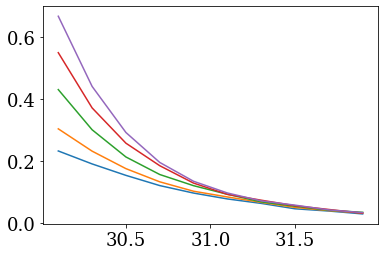

In [53]:
Nsector = 1000 # how many simulations?

Nflares = 50 # typical  number of flares

for i in range(1,25,5):
    Nflare_std = i

    xbig = np.array([])
    ybig = np.array([])

    for k in range(Nsector):
        # ge/nerates random variates of power law distribution
        Nflare_k = int(Nflares + np.random.normal(loc=0, scale=Nflare_std))
        if Nflare_k < 0:
            Nflare_k = 1

        vrs = powerlaw.Power_Law(xmin=xmin, parameters=[a]).generate_random(Nflare_k)
        xx = np.log10(vrs[np.argsort(vrs)]) + Lum
        yy = np.arange(len(xx))[::-1] / TOTDUR
        xbig = np.append(xbig, xx)
        ybig = np.append(ybig, yy)

    ss, be, bn = binned_statistic(xbig, ybig, statistic='std', bins=10, range=[30,32])
    mm, be, bn = binned_statistic(xbig, ybig, statistic='mean', bins=10, range=[30,32])

# plt.figure()
# plt.scatter(xbig, ybig, s=1, alpha=0.1)
# plt.yscale('log')
# plt.errorbar((be[1:]+be[:-1])/2, mm, yerr=ss, linestyle='none', c='r')
# plt.ylim(1e-3, 1e1)


# plt.figure()
    plt.plot((be[1:]+be[:-1])/2, ss)
# plt.plot(np.linspace(30,32, 50)[::-1], Perror(np.arange(50)) / np.arange(50) )

In [50]:
Perror(np.array([50.]))

array([23.377444])